In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
#Exercise 1

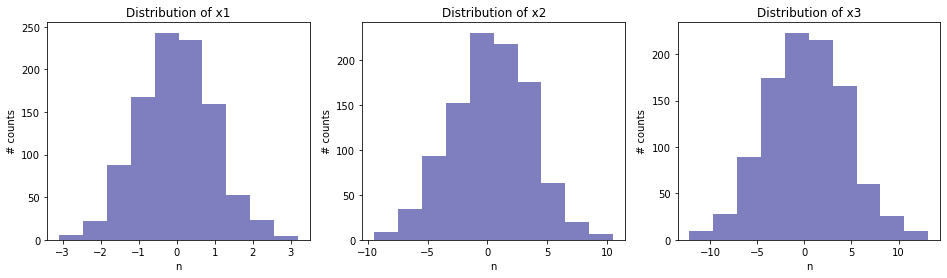

In [3]:
#Generate a dataset simulating 3 features

N=1000

#Generate the datasets
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1+x2

X = np.array([x1,x2,x3])

#Plot the datasets
fig, ax = plt.subplots(ncols=3,figsize=(16, 4))
for i in range(0,3):
    ax[i].hist(X[i], color = "navy", alpha = 0.5)
    ax[i].set_xlabel("n")
    ax[i].set_ylabel("# counts")
    ax[i].set_title("Distribution of x"+str(i+1))
    


In [4]:
#Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

cov = np.cov(X)#Covariance matrix
print("Covariance matrix:\n", cov, '\n')

avl, avt = la.eig(cov) #Eigenvalues and eigenvectors
avl = np.real_if_close(avl)

print("EIGENDECOMPOSITION OF THE COVARIANCE MATRIX: \n")
print("Eigenvalues: \n", avl, '\n')
print("Eigenvectors:\n", avt, '\n')



Covariance matrix:
 [[ 0.9700878   0.9029248   2.8431004 ]
 [ 0.9029248  10.36563085 12.17148045]
 [ 2.8431004  12.17148045 17.85768126]] 

EIGENDECOMPOSITION OF THE COVARIANCE MATRIX: 

Eigenvalues: 
 [ 2.71514543e+01 -1.19920933e-16  2.04194562e+00] 

Eigenvectors:
 [[-0.10736423 -0.81649658  0.5672797 ]
 [-0.58740867 -0.40824829 -0.69877349]
 [-0.80213713  0.40824829  0.43578591]] 



In [5]:
#Find the eigenvectors and eigenvalues using the SVD

U, S, Vt = la.svd(X)

avl_svd = S**2/(N-1)
avt_svd = U

print("SVD \n")
print("Eigenvalues: \n", avl_svd, '\n')
print("Eigenvectors: \n", avt_svd, '\n')


SVD 

Eigenvalues: 
 [2.72835477e+01 2.05331876e+00 4.04906785e-32] 

Eigenvectors: 
 [[-0.10649053  0.56744436 -0.81649658]
 [-0.58848404 -0.69786809 -0.40824829]
 [-0.8014651   0.43702063  0.40824829]] 



**Comments**

The results with the two methods are the same, within a reasonable accuracy

In [6]:
#What percent of the total dataset's variability is explained by the principal components?

Lambda = np.diag(avl)

for i in range(0,3):
    print("Component", i, "explains %.2f %% of the total variability" % (Lambda[i,i]/Lambda.trace()*100))

print("\n =>Principal components are x1 and x3 \n")

print("Reducing the dimensionality to 2 we retain %.2f%%"% ((Lambda[0,0]+Lambda[2,2])/Lambda.trace()*100), "of the variability")


Component 0 explains 93.01 % of the total variability
Component 1 explains -0.00 % of the total variability
Component 2 explains 6.99 % of the total variability

 =>Principal components are x1 and x3 

Reducing the dimensionality to 2 we retain 100.00% of the variability


**Comments**

The result makes sense: there are only two independent datasets

In [7]:
#Redefine the data according to the new basis from the PCA

X_new = np.dot(avt.T, X)

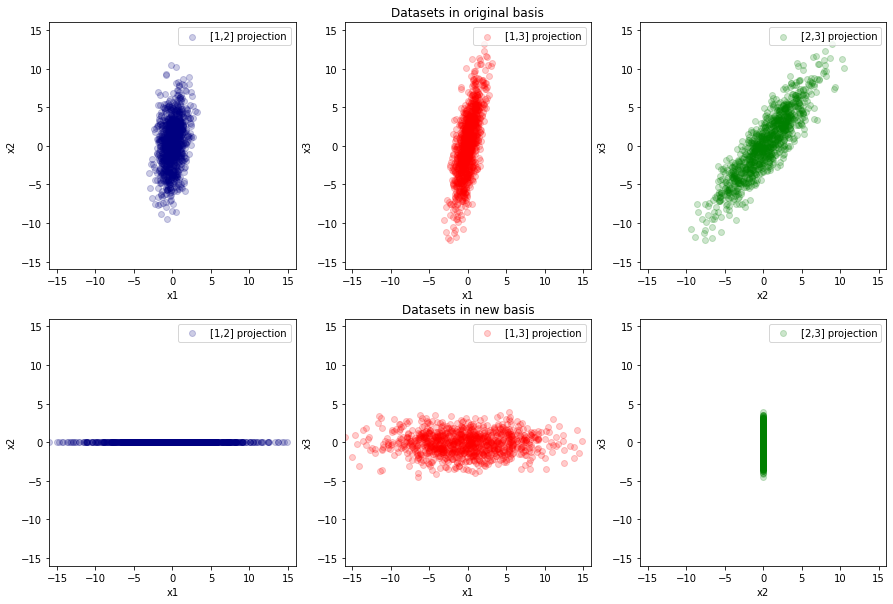

In [8]:
#Plot the data, in both the original and the new basis

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))


ax1.scatter(X[0, :], X[1, :], alpha=0.2, c = "navy",label = "[1,2] projection")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")

ax2.set_title("Datasets in original basis")
ax2.scatter(X[0, :], X[2, :], alpha=0.2, c = "red",label = "[1,3] projection")
ax2.set_xlabel("x1")
ax2.set_ylabel("x3")

ax3.scatter(X[1, :], X[2, :], alpha=0.2, c = "green",label = "[2,3] projection")
ax3.set_xlabel("x2")
ax3.set_ylabel("x3")

ax4.scatter(X_new[0, :], X_new[1, :], alpha=0.2, c = "navy",label = "[1,2] projection")
ax4.set_xlabel("x1")
ax4.set_ylabel("x2")

ax5.set_title("Datasets in new basis")
ax5.scatter(X_new[0, :], X_new[2, :], alpha=0.2, c = "red",label = "[1,3] projection")
ax5.set_xlabel("x1")
ax5.set_ylabel("x3")

ax6.scatter(X_new[1, :], X_new[2, :], alpha=0.2, c = "green",label = "[2,3] projection")
ax6.set_xlabel("x2")
ax6.set_ylabel("x3")


for ax in fig.get_axes():
    ax.legend(loc="upper right")
    ax.set_xlim(-16,16)
    ax.set_ylim(-16,16)

plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [9]:
#Exercise 2

noise=[]

for i in range(10):
    noise.append(np.random.normal(0, 1/20, N))

D = np.concatenate((X, np.array(noise)))


cov_D = np.cov(D)
avl, avt = la.eig(cov_D)
Lambda = np.diag(np.real_if_close(avl))

print("\nPercentage of total variability retained considering only two datasets \n")
for i in range(1, len(D)):
    k=abs(Lambda[i-1,i-1]+Lambda[i,i])/Lambda.trace()*100
    print(i, "-", i+1, "-> %.3f" %k, "% of the total variability is retained")



Percentage of total variability retained considering only two datasets 

1 - 2 -> 99.913 % of the total variability is retained
2 - 3 -> 6.989 % of the total variability is retained
3 - 4 -> 0.010 % of the total variability is retained
4 - 5 -> 0.020 % of the total variability is retained
5 - 6 -> 0.017 % of the total variability is retained
6 - 7 -> 0.015 % of the total variability is retained
7 - 8 -> 0.016 % of the total variability is retained
8 - 9 -> 0.016 % of the total variability is retained
9 - 10 -> 0.017 % of the total variability is retained
10 - 11 -> 0.017 % of the total variability is retained
11 - 12 -> 0.018 % of the total variability is retained
12 - 13 -> 0.018 % of the total variability is retained


**Comments**

The original datasets (1,2,3) take into account most of the variability: the effect of the noise is negligible, the principal components are the same as before.

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [10]:
#Exercise 3

# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P Data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P Data/ 

In [11]:
#Read the data

df = pd.read_csv('Data/magic04.data')
labels = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df.columns = labels

df = df.drop(["class"], axis=1) #Non-numerical entries
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980
...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [13]:
# PCA

data = df.to_numpy()

print("Dataset has: ", data.shape[1], "columns of",data.shape[0], "rows each \n" )
data = data.reshape((data.shape[1], data.shape[0])) #I write data as a matrix

cov = np.cov(data)
avl, avt = la.eig(cov)

avl = np.real_if_close(avl)
Lambda = np.diag(avl)

print("Variability retained by a single dataset (%):")
pca = abs(avl/Lambda.trace())
print(pca*100)

print("\nThreshold = 90%")
cumulative = 0
for i in range(1, len(pca)+1):
    cumulative = pca[:i].sum()
    if cumulative > 0.90:
        print("PCA succeded with", i, "datasets -> total variability: %.3f" %(cumulative*100), "%")
        break


Dataset has:  10 columns of 19019 rows each 

Variability retained by a single dataset (%):
[21.02698909 18.36186984  2.62705882  5.72061255 10.23159806 10.58278273
  6.97127785  7.68542962  8.35124693  8.44113451]

Threshold = 90%
PCA succeded with 9 datasets -> total variability: 91.559 %
